In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

### Average Correlation Matrices

In [334]:
## simulate data

# simulation parameters
N = 1000  # time points
M =   20  # channels

# time vector (radian units)
t = np.linspace(0,6*np.pi,N)

# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))

# create the data
data = np.zeros((M,N))
for mi in range(M):
    data[mi:] = np.sin(t) * chanrel[mi]


# Create 20 matrices with the same underlying features but different set of noise
noise = np.linspace(.01,100,20)
data_list = []
Corr_matrices = []

for idx,n in enumerate(noise):
    
    # group all the data matrices
    data_list.append(data + np.random.randn(M,N)*n)
    # calculate each correlation
    Corr_matrices.append(np.corrcoef(data_list[idx]))

# avg the data matrices
data_avg  = np.sum(data_list,axis=0)/len(noise)

# calculate corrcoefs matrices
Corr_data  = np.corrcoef(data_avg)
Corrs_avg = np.sum(Corr_matrices,axis=0)/len(noise)

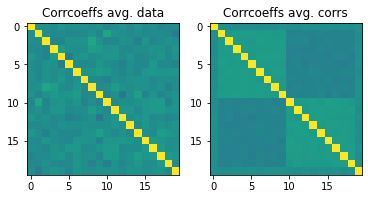

In [335]:
# Plot correlation matrices

plt.subplot(121)
plt.imshow(Corr_data,vmin=-.5,vmax=.5)
plt.title('Corrcoeffs avg. data')

plt.subplot(122)
plt.imshow(Corrs_avg,vmin=-.5,vmax=.5)
plt.title('Corrcoeffs avg. corrs')
plt.show()

### Average Correlation Matrices (wrong code)

In [340]:
## simulate data

# simulation parameters
N = 1000  # time points
M =   20  # channels

# time vector (radian units)
t = np.linspace(0,6*np.pi,N)

# relationship across channels (imposing covariance)
chanrel = np.sin(np.linspace(0,2*np.pi,M))

# create the data
data = np.zeros((M,N))
for mi in range(M):
    data[mi:] = np.sin(t) * chanrel[mi]

data = data + np.random.randn(M,N)

# Create 20 matrices with the same underlying features but different set of noise
noise = np.linspace(.00001,3700,20)
data_avg = np.zeros((M,N))
Corr_avgcorrs = np.zeros((M,M))

for noisei in range(len(noise)):
    
    # avg the data
    data = data * noise[noisei]
    data_avg += data/len(noise)

    # compute corrcoed each iteration and average
    Corr_avgcorrs += np.corrcoef(data)/len(noise)
    
# Correlation coefficient from averaged data
Corr_avgdata = np.corrcoef(data_avg)

# two ways of visualizing the multichannel data
# for i in range(M):
#     plt.plot(t,data[i,:]+i*4)
    
# plt.yticks([])
# plt.xlabel('Time (a.u.)')
# plt.ylabel('Channel')
# plt.show()

# plt.imshow(data,aspect='auto',vmin=-2,vmax=2,extent=[t[0],t[-1],0,M])
# plt.xlabel('Time (a.u.)')
# plt.ylabel('Channel')
# plt.show()

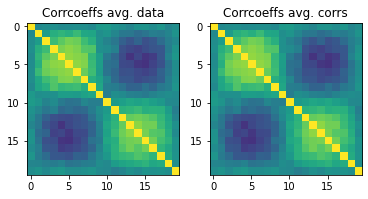

In [320]:
# Plot

plt.subplot(121)
plt.imshow(Corr_avgdata,vmin=-.5,vmax=.5)
plt.title('Corrcoeffs avg. data')

plt.subplot(122)
plt.imshow(Corr_avgcorrs,vmin=-.5,vmax=.5)
plt.title('Corrcoeffs avg. corrs')
plt.show()
